In [229]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

import urllib.request
import io
import zipfile

In [230]:
"""No copy of G, G'' is required. 
"""
def newmann_ziff(G : nx.Graph, node_order : list, storage_interval : int = 10):
    n = G.number_of_nodes()
    node_to_label = np.zeros(n, dtype=int)
    cluster_to_nodes = {}
    nodes_added = set()
    current_label = 0

    log_comps = []
    log_max_com = []
    i = 0
    for current_node in node_order:
        nodes_added.add(current_node)
        cluster_to_nodes[current_label] = set([current_node])
        node_to_label[current_node] = current_label

        for neigbour_node in G.neighbors(current_node):
            if node_to_label[neigbour_node] != current_label and neigbour_node in nodes_added:
                cluster_to_nodes[current_label] = \
                    cluster_to_nodes[current_label].union(cluster_to_nodes[node_to_label[neigbour_node]])
                cluster_to_nodes[node_to_label[neigbour_node]].clear()
                node_to_label[neigbour_node] = current_label

        if i % storage_interval == 0:
            log_comps.append(np.array([len(cluster_to_nodes[cluster]) for cluster in cluster_to_nodes]))
            log_max_com.append(max(log_comps[-1]))

        i += 1
        current_label += 1

    return log_comps, log_max_com

In [231]:
def gen_exp_graph(N, gamma):
    """
    Returns a networx graph according to a power law degree distribution
    """
    sum_is_odd = True

    sequence = []
    
    while sum_is_odd:
        sequence = np.array(nx.utils.powerlaw_sequence(N, gamma), dtype=int)
        sum_is_odd = np.sum(sequence) % 2 == 1


    return nx.configuration_model(sequence)

In [232]:
def sample_ER(N, p):
    rd = np.random.rand(N,N)
    # we multiply by 2 since when iterating over nodes (i,j) each edge is considered twice
    A = np.triu(rd < (p))
    np.fill_diagonal(A, 0)
    return nx.from_numpy_matrix(A)

In [233]:
N = 1000
graph_generators = []

g_1 = lambda N : gen_exp_graph(N, 2.3)
g_2 = lambda N : sample_ER(N, 0.1)
g_3 = lambda N : nx.planted_partition_graph(5, int(N/5), 0.1, 0.01)

graph_generators.append(g_1)
graph_generators.append(g_2)
graph_generators.append(g_3)

graph_labels = ['Power Law', 'Erdos-Renyi', 'Planted Partition']


In [234]:
percolation_weights = []
f_1 = lambda G : np.random.random(G.number_of_nodes())
f_2 = lambda G : nx.betweenness_centrality(G).values()
f_3 = lambda G : nx.closeness_centrality(G).values()
f_4 = lambda G : nx.degree_centrality(G).values()

percolation_weights.append(f_1)
#percolation_weights.append(f_2)
percolation_weights.append(f_3)
percolation_weights.append(f_4)

labels = ['Uniform Random', 'Betweenness', 'Closeness', 'Degree']


weight calc exec time 0.0001747608184814453
newmann_ziff exec time 0.0071146488189697266
weight calc exec time 0.7592208385467529
newmann_ziff exec time 0.0067975521087646484
weight calc exec time 0.0014529228210449219
newmann_ziff exec time 0.007426023483276367
weight calc exec time 0.00010824203491210938
newmann_ziff exec time 0.2316725254058838
weight calc exec time 1.2901685237884521
newmann_ziff exec time 0.2370927333831787
weight calc exec time 0.001003265380859375
newmann_ziff exec time 0.23843598365783691
weight calc exec time 0.0001499652862548828
newmann_ziff exec time 0.030420780181884766
weight calc exec time 0.7846801280975342
newmann_ziff exec time 0.032428741455078125
weight calc exec time 0.00043463706970214844
newmann_ziff exec time 0.032196998596191406


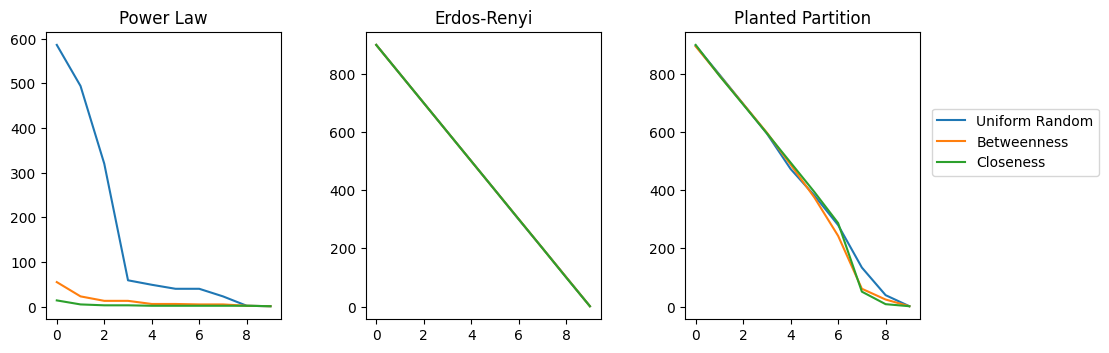

In [236]:
import time

fig, axs = plt.subplots(1, ncols=len(graph_generators), figsize=(10, 4))
fig.tight_layout(pad=3.0)
for i in range(len(graph_generators)):
    graph = graph_generators[i](N)
    ls = np.array(list(graph.nodes))

    #nx.draw(graph, ax=axs[0, i], node_size=5)
    axs[i].set_title(graph_labels[i])

    for j in range(len(percolation_weights)):
        start = time.time()
        weight = list(percolation_weights[j](graph))
        end = time.time()
        print('weight calc exec time', end - start)
        #print(weight)
        ind = np.argsort(weight)
        #print(ind)
        ls__ = ls.copy()[ind]
        #print(ls__)
        start = time.time()
        distr, mx = newmann_ziff(graph, ls__, storage_interval = int(graph.number_of_nodes() * 0.1))
        end = time.time()
        print('newmann_ziff exec time', end - start)
        #print(distr)
        #print(f)
        axs[i].plot(np.flip(mx), label=labels[j])
        #axs[i].set_title(labels[j])

axs[-1].legend(loc=(1.05, 0.5))